# Using LIME

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283839 sha256=6d58a99f04eb855143fa6ce719f15952739e756e74dd4353dacf54a8b86cfb42
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_image
from skimage.io import imread
from skimage.segmentation import mark_boundaries

In [ ]:
# img_path ='./chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'
# img_path = './chest_xray/test/PNEUMONIA/person100_bacteria_477.jpeg'
img_path = '/content/Covid.jpeg'

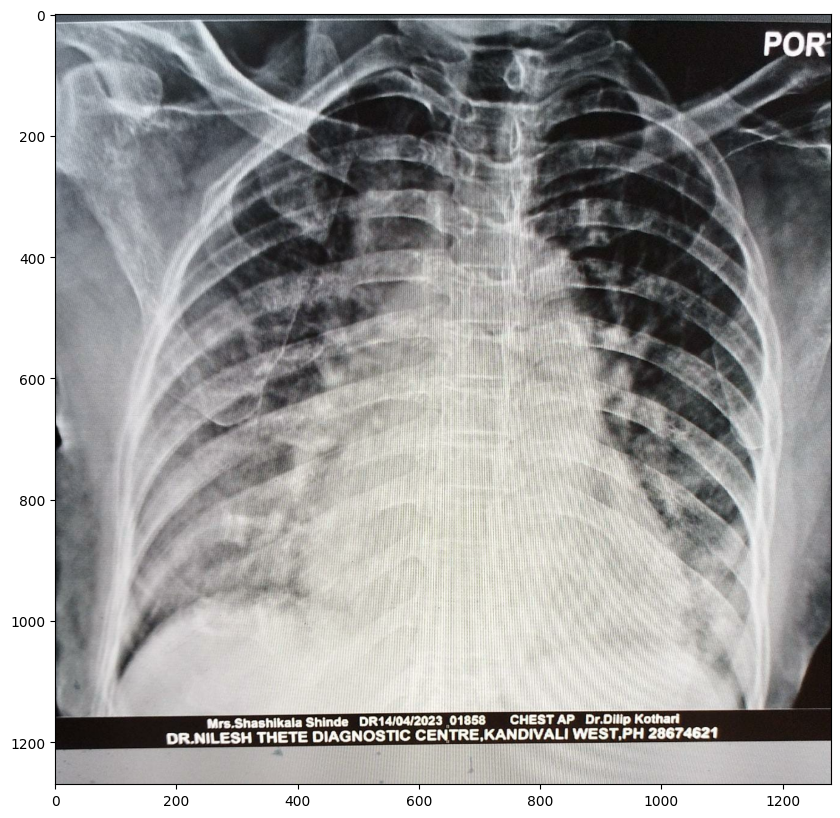

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
img_samp_n = cv2.imread(img_path)
plt.imshow(img_samp_n);

In [ ]:
p_img = proc_img(img_path)
prnt_out(p_img)

1/1 [==============================] - 1s 520ms/step
Our network is 99.97% sure this is PNEUMONIA


In [ ]:
explainer = lime_image.LimeImageExplainer()

**explain_instance**(image, classifier_fn,  top_labels=5, hide_color=None,  num_samples=1000, distance_metric='cosine')



* **top_labels** – if not None, ignore labels and produce explanations for the K labels with highest prediction probabilities, where K is this parameter.
* **num_features** – maximum number of features present in explanation
* **num_samples** – size of the neighborhood to learn the linear model
* **distance_metric** – the distance metric to use for weights.



In [ ]:
explanation = explainer.explain_instance(p_img[0], model.predict,
                                         top_labels=2, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


**get_image_and_mask**(label, positive_only=True, hide_rest=False, num_features=5, min_weight=0.0)

* **label** – label to explain
* **positive_only** – if True, only take superpixels that contribute to the prediction of the label. Otherwise, use the top num_features superpixels, which can be positive or negative towards the label
* **hide_rest** – if True, make the non-explanation part of the return image gray
* **num_features** – number of superpixels to include in explanation



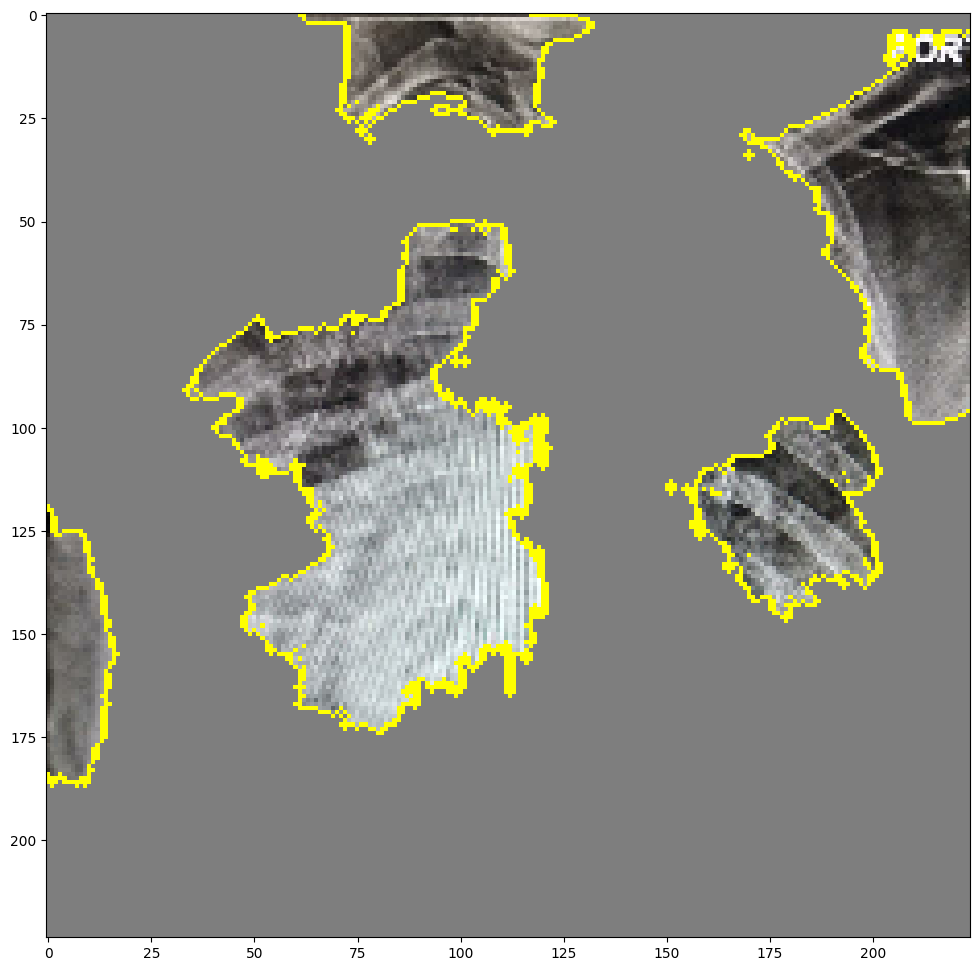

In [ ]:
temp, mask = explanation.get_image_and_mask(label=1, positive_only=True,
                                            num_features=15, hide_rest=True,
                                            min_weight=0.0000004)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.rcParams['figure.figsize'] = (16.0, 12.0)
plt.imshow(mark_boundaries(tempp, mask));

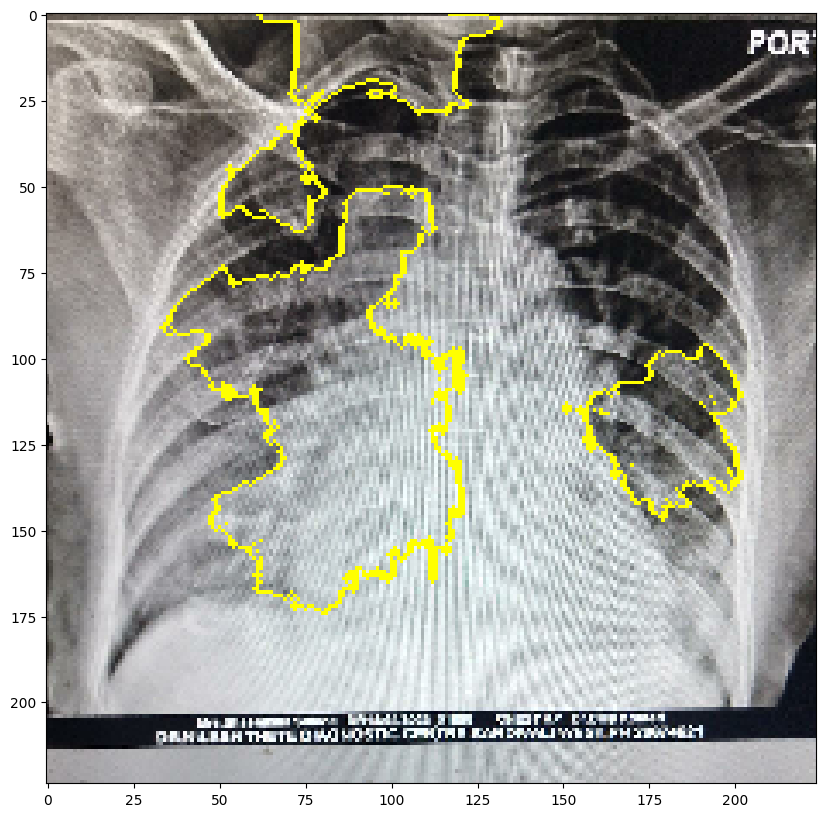

In [ ]:
temp, mask = explanation.get_image_and_mask(label=1, positive_only=True,
                                            num_features=15, hide_rest=False,
                                            min_weight=0.0000004)

tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.imshow(mark_boundaries(tempp, mask));

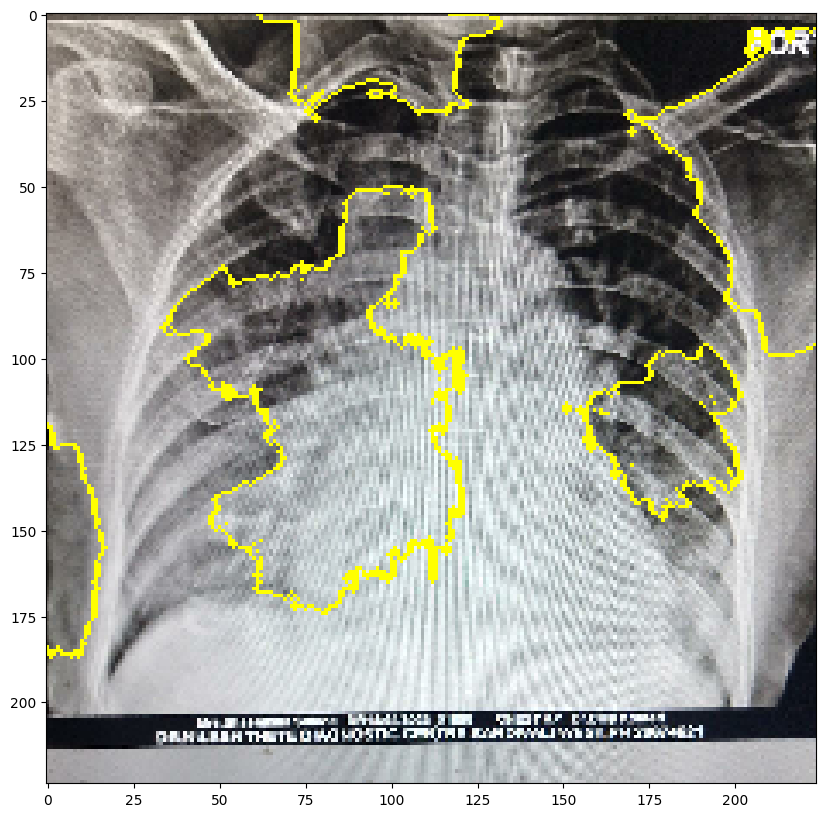

In [ ]:
temp, mask = explanation.get_image_and_mask(label=1, positive_only=True,
                                            num_features=15, hide_rest=False,
                                            min_weight=0.0000004)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.imshow(mark_boundaries(tempp, mask));

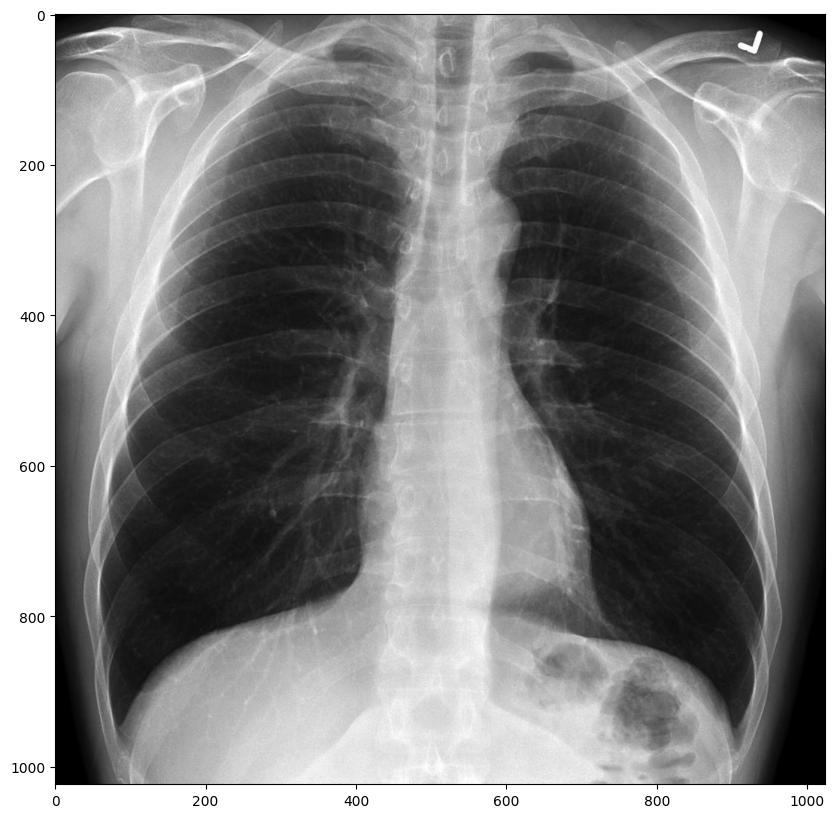

In [ ]:
img_path = '/content/Normal.jpg'
plt.rcParams['figure.figsize'] = (12.0, 10.0)
img_samp_n = cv2.imread(img_path)
plt.imshow(img_samp_n);

In [ ]:
p_img = proc_img(img_path)
prnt_out(p_img)

AttributeError: ignored

In [ ]:
explanation = explainer.explain_instance(p_img[0], model.predict,
                                         top_labels=2, hide_color=0,
                                         num_samples=1000,
                                         distance_metric='cosine')

# temp, mask = explanation.get_image_and_mask(label=1, positive_only=True,
#                                             num_features=15, hide_rest=True,
#                                             min_weight=0.00000001)
# tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
# plt.rcParams['figure.figsize'] = (12.0, 10.0)
# plt.imshow(mark_boundaries(tempp, mask));

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


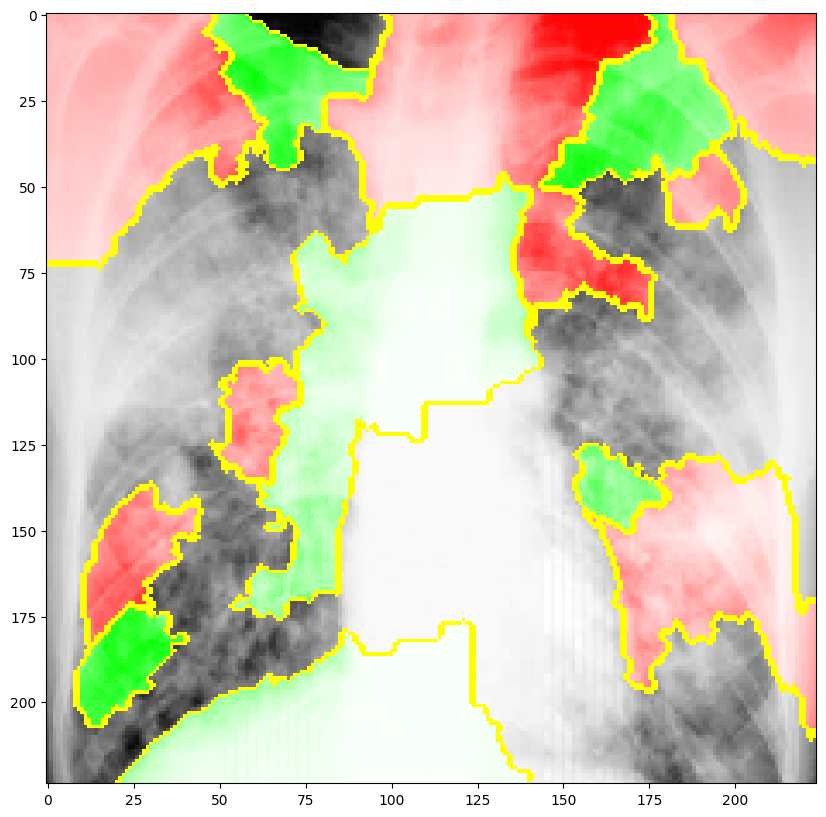

In [ ]:
temp, mask = explanation.get_image_and_mask(label=1, positive_only=False,
                                            num_features=15, hide_rest=False,
                                            min_weight=0.00000004)
tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.imshow(mark_boundaries(tempp, mask))

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


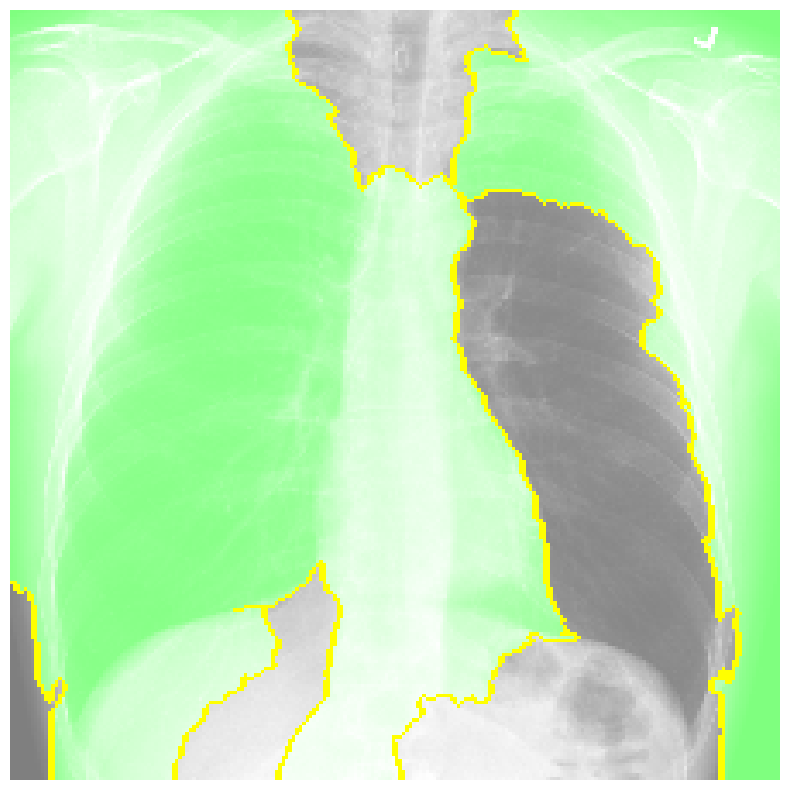

In [ ]:
image = cv2.imread("/content/Normal.jpg")
resized_img = cv2.resize(image, (224, 224))
np_img = np.array(resized_img)
np_img = np_img/255
img_arr = np.array([np_img])

for index, resized_img in enumerate(img_arr):
        explainer = lime_image.LimeImageExplainer()
        explanation = explainer.explain_instance(resized_img.astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=15, hide_rest=False)
        plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
        plt.axis('off')
        plt.show()

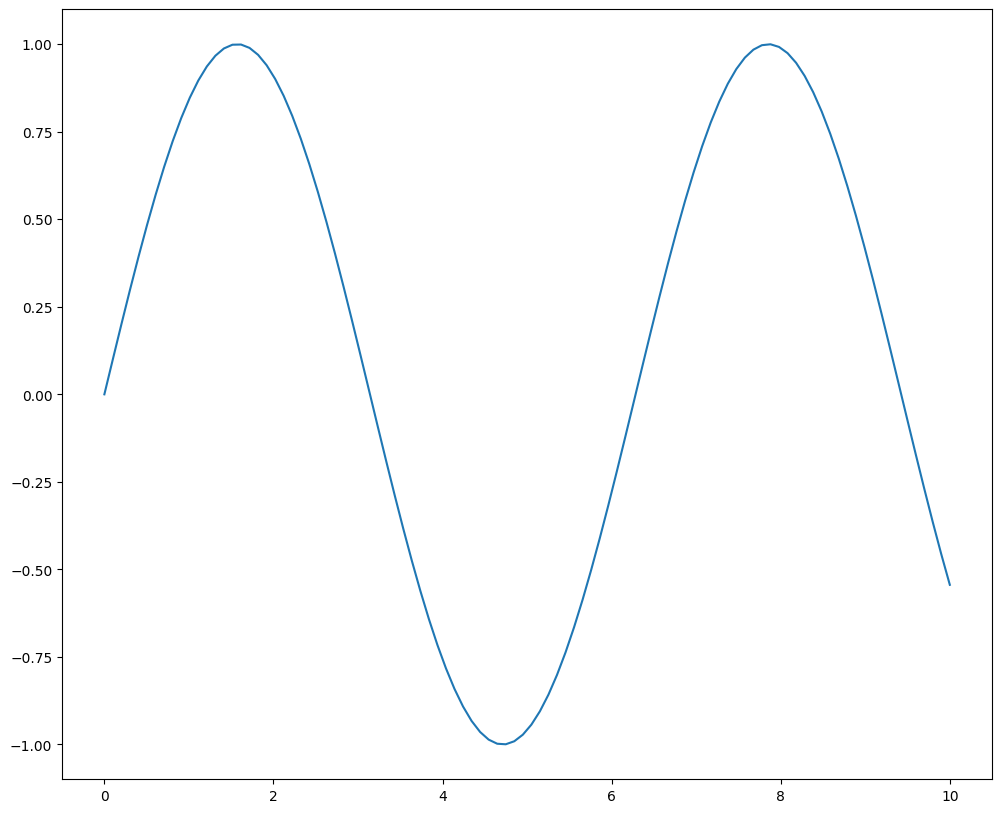

In [ ]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create the plot with the default color map
plt.plot(x, y)

# Swap green and red colors by modifying the color map
plt.set_cmap('cool')  # Swap green and red by using 'cool' color map

# Show the plot
plt.show()

## Display more X-rays

In [ ]:
print('NORMAL')
i_ = 0
plt.rcParams['figure.figsize'] = (18.0, 18.0)
plt.subplots_adjust(wspace=0.2, hspace=0)
for l in sample_data['image'][sample_data['label']==0]:


    plt.subplot(4, 4, i_+1)
    img_path = './'+np.str(l)
    p_img = proc_img(img_path)
    explanation = explainer.explain_instance(p_img[0], model.predict,
                                         top_labels=2, hide_color=0,
                                         num_samples=1000)

    temp, mask = explanation.get_image_and_mask(label=0, positive_only=True,
                                            num_features=15, hide_rest=True)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))

    plt.imshow(mark_boundaries(tempp, mask));

    plt.axis('off')
    i_ += 1

PNEUMONIA


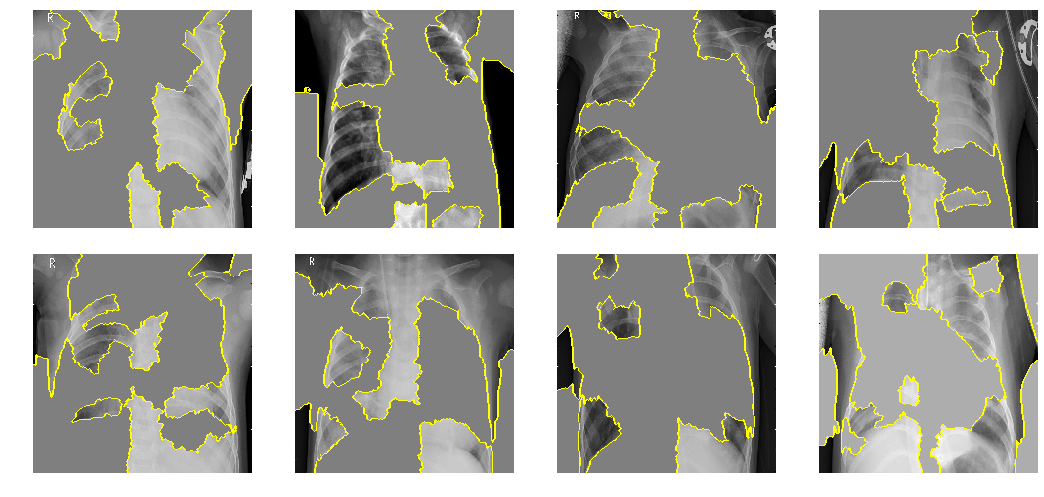

In [ ]:
print('PNEUMONIA')
i_ = 0
plt.rcParams['figure.figsize'] = (18.0, 18.0)
plt.subplots_adjust(wspace=0.2, hspace=0)
for l in test_data['image'][test_data['label']==1][:8]:


    plt.subplot(4, 4, i_+1)
    img_path = './'+np.str(l)
    p_img = proc_img(img_path)
    explanation = explainer.explain_instance(p_img[0], model.predict,
                                         top_labels=2, hide_color=0,
                                         num_samples=1000)

    temp, mask = explanation.get_image_and_mask(label=1, positive_only=True,
                                            num_features=15, hide_rest=True)
    tempp = np.interp(temp, (temp.min(), temp.max()), (0, +1))

    plt.imshow(mark_boundaries(tempp, mask));

    plt.axis('off')
    i_ += 1

In [ ]:
from keras.models import load_model
model = load_model("/content/drive/MyDrive/IPD NOTES/grad_cam_model.h5")

In [ ]:
import numpy as np
import cv2

In [ ]:
def proc_img(img_path):
  "process the image"
  # `img` is a PIL image of size 224x224
  img = image.load_img(img_path, target_size=(224, 224))

  # `x` is a float32 Numpy array of shape (224, 224, 3)
  x_img = image.img_to_array(img)

  # We add a dimension to transform our array into a matrix
  # of size (1, 224, 224, 3)
  x_img = np.expand_dims(x_img, axis=0)

  # Finally we preprocess the batch
  # (this does channel-wise color normalization)
  #x_img = preprocess_input(x_img)
  x_img = preprocess_input(x_img)
  return x_img

In [ ]:
def prnt_out(x_img):
  "prints the probability that the model predict with its label"
  pred = model.predict(x_img)
  if pred[0,0] >= 0.5:
      print('Our network is {:.2%} sure this is NORMAL'.format(pred[0][0]))
  else:
      print('Our network is {:.2%} sure this is PNEUMONIA'.format(1-pred[0][0]))

In [ ]:
"""To visualize which parts of the image are the most important for the each
label for the classifier, let’s set up the Grad-CAM process."""



def get_img_array(img_path, size):
    img_arr = cv2.imread(img_path)
    img_arr = crop_brain_contour(img_arr, False)
    img_arr = cv2.resize(img_arr, (256, 256))
    img_arr = img_arr.reshape(1, 256, 256, 3)
    return img_arr


blck = 'conv_pw_13'  #MobileNet
#blck ='conv_pw_13_relu'
#blck = 'Conv_1'  #MobileNetV2
def xray_CAM(x_img, blck, label):
  "gives the CAM heatmap"
  #normal=0 and pneumonia=1

  # the prediction vector
  pred_output = model.output[:, label]

  # The is the output feature map of the `conv_pw_13` layer,
  # the last convolutional layer in MobileNet
  last_conv_layer = model.get_layer(blck)

  # This is the gradient of the image's class with regard to
  # the output feature map of `conv_pw_13`
  grads = K.gradients(pred_output, last_conv_layer.output)[0]

  # This is a vector of shape (512,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of `block5_conv3`,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image of two elephants
  pooled_grads_value, conv_layer_output_value = iterate([x_img])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the elephant class
  for i in range(1024): # we have 1024 features in our last conv layer
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation
  heatmap = np.mean(conv_layer_output_value, axis=-1) # create a heatmap
  heatmap = np.maximum(heatmap, 0)  # remove negative values
  heatmap /= np.max(heatmap)  # normalize


  #!pip install tensorflow
import keras.utils as image
#from keras.preprocessing.image import img_to_array

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = tf.keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = tf.keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

    # return heatmap

In [ ]:
def show_on_xray(img_path, heatmap):
  # We use cv2 to load the original image
  img = cv2.imread(img_path)

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img

  ## Save the image to disk
  cv2.imwrite('./xray_cam.jpg', superimposed_img)
  img_samp = cv2.imread('./xray_cam.jpg')  #OpenCV has BGR order
  img_samp = cv2.cvtColor(img_samp, cv2.COLOR_BGR2RGB)  #matplotlib has RGB order

  plt.imshow(img_samp)

In [ ]:
# The local path to our target image
#img_path = './chest_xray/val/PNEUMONIA/person1947_bacteria_4876.jpeg'
img_path ='/content/pneumonia2.jpg'

x_img = proc_img(img_path)

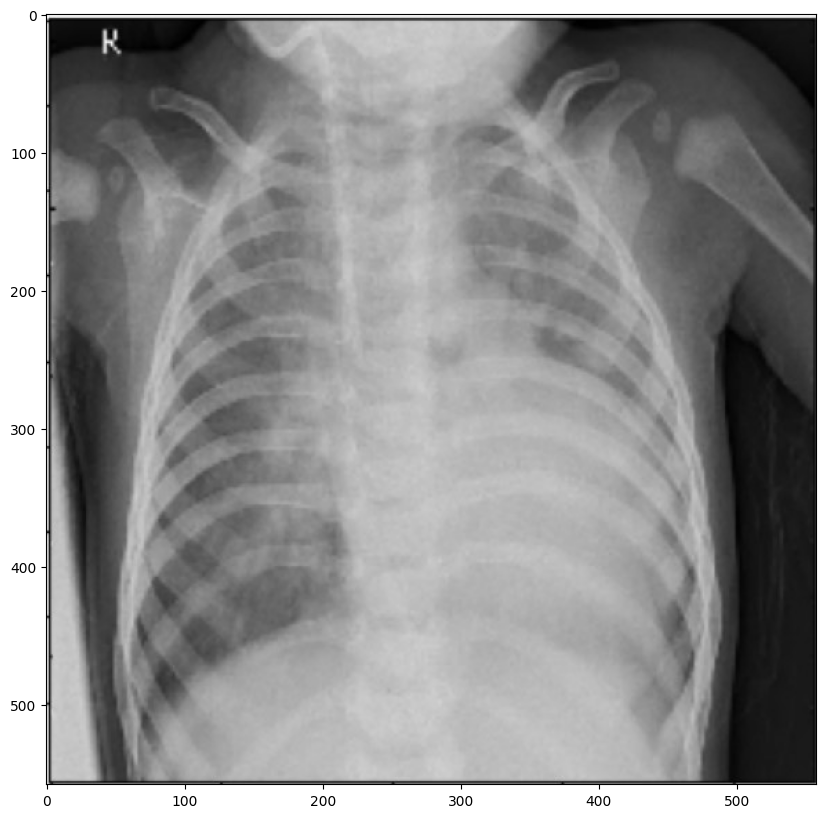

In [ ]:
plt.rcParams['figure.figsize'] = (12.0, 10.0)
img_samp = cv2.imread(img_path)
plt.imshow(img_samp);